In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def fun(x):
    return 3 * x**4 - 7 * x**3 + 2 * x**2 + 11

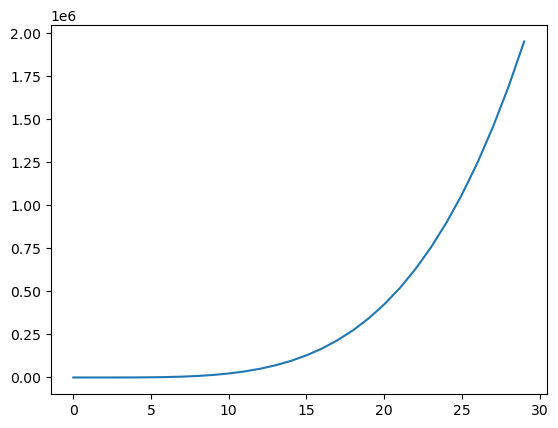

In [3]:
x = np.arange(0, 30)
plt.plot(x, fun(x))

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regression(x, y, degree=3):
  poly = PolynomialFeatures(degree)
  x_poly = poly.fit_transform(x.reshape(-1, 1))

  model = LinearRegression()
  model.fit(x_poly, y)
  return model.predict(x_poly)

Text(0, 0.5, 'Y')

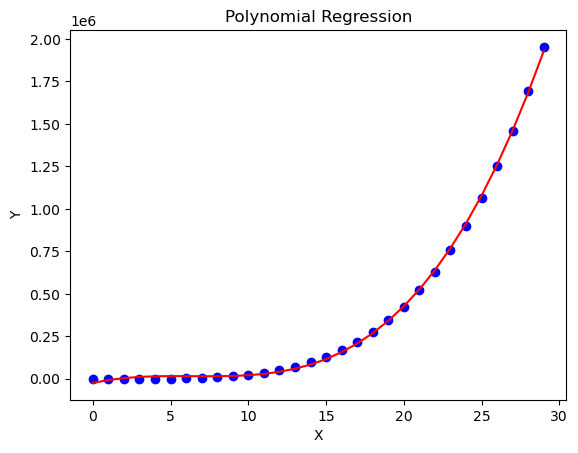

In [5]:
y_pred = polynomial_regression(x, fun(x))
plt.title('Polynomial Regression')
plt.plot(x, y_pred, color='red')
plt.scatter(x, fun(x), color='blue')
plt.xlabel('X')
plt.ylabel('Y')

## Gradient Discent

(np.float64(-1.4008617749474424), np.float64(-1.237676294880945), np.float64(-0.689765797956417), np.float64(1.228140471950126), np.float64(11.237160966215388))


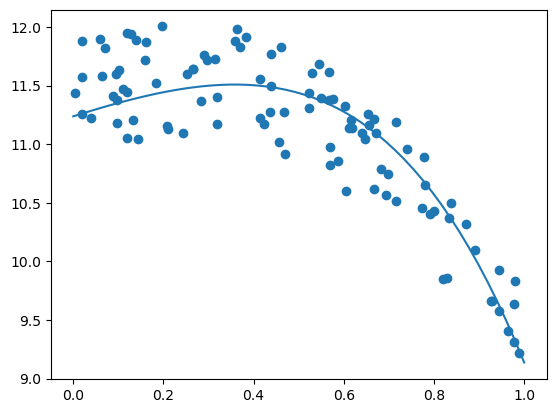

In [6]:
np.random.seed(0)
x = np.random.rand(100,1)
y = 3 * x**4 - 7 * x**3 + 2 * x**2 + 11 + np.random.rand(100,1)

# m0 x4 + m1 x3 + m2 x2 + m3 x + m4
def gd(x, y, m0=0, m1=0, m2=0, m3=0, m4=0, epoch=10000, learn=0.001):
    n = len(x)
    for i in range(epoch):
        y_n = m0 * x**4 + m1 * x**3 + m2 * x**2 + m3 * x + m4
        m4_l = - 2 / n * np.sum(y - y_n)
        m3_l = - 2 / n * np.sum((y - y_n) * x)
        m2_l = - 2 / n * np.sum((y - y_n) * x**2)
        m1_l = - 2 / n * np.sum((y - y_n) * x**3)
        m0_l = - 2 / n * np.sum((y - y_n) * x**4)

        m4 = m4 - learn * m4_l
        m3 = m3 - learn * m3_l
        m2 = m2 - learn * m2_l
        m1 = m1 - learn * m1_l
        m0 = m0 - learn * m0_l
    return m0, m1, m2, m3, m4


m0, m1, m2, m3, m4 = gd(x, y)
print(gd(x, y))
x_p = np.linspace(0, 1)

plt.plot(x_p, m0 * x_p**4 + m1 * x_p**3 + m2 * x_p**2 + m3 * x_p + m4)
plt.scatter(x,y)
plt.show()
